In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv

In [2]:
alpha_list = []
beta_list = []

psi_err_array = []
V_err_array = []
timeStep_array = []
numIter_array = []

first_iteration = 1

with open('../results/params_BDF23.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        alpha = row['alpha']
        beta = row['beta']
        V_err = row['V_err']
        psi_err = row['psi_err']
        num_timeSteps = row['num_timesteps']
        num_iter = row['num_iter']

        if alpha not in alpha_list:
            if (first_iteration == 0):
                psi_err_array.append(psi_err_list)
                V_err_array.append(V_err_list)
                timeStep_array.append(timeStep_list)
                numIter_array.append(numIter_list)

            alpha_list.append(alpha)
                        
            psi_err_list = []
            V_err_list = []
            timeStep_list = []
            numIter_list = []
            
            
        if beta not in beta_list:
            beta_list.append(beta)
                        
        psi_err_list.append(psi_err)
        V_err_list.append(V_err)
        timeStep_list.append(num_timeSteps)
        numIter_list.append(num_iter)

        first_iteration = 0
        
      
beta_BDF2 = np.asarray(beta_list, dtype=np.float32)
alpha_BDF2 = np.asarray(alpha_list, dtype=np.float32)

psi_BDF2 = np.asarray(psi_err_array, dtype=np.float32)
V_BDF2 = np.asarray(V_err_array, dtype=np.float32)
TS_BDF2 = np.asarray(timeStep_array, dtype=np.float32)
NI_BDF2 = np.asarray(numIter_array, dtype=np.float32)
        


In [3]:
alpha_list = []
beta_list = []

psi_err_array = []
V_err_array = []
timeStep_array = []
numIter_array = []

first_iteration = 1

with open('../results/params_BDF12.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        alpha = row['alpha']
        beta = row['beta']
        V_err = row['V_err']
        psi_err = row['psi_err']
        num_timeSteps = row['num_timesteps']
        num_iter = row['num_iter']

        if alpha not in alpha_list:
            if (first_iteration == 0):
                psi_err_array.append(psi_err_list)
                V_err_array.append(V_err_list)
                timeStep_array.append(timeStep_list)
                numIter_array.append(numIter_list)

            alpha_list.append(alpha)
                        
            psi_err_list = []
            V_err_list = []
            timeStep_list = []
            numIter_list = []
            
            
        if beta not in beta_list:
            beta_list.append(beta)
                        
        psi_err_list.append(psi_err)
        V_err_list.append(V_err)
        timeStep_list.append(num_timeSteps)
        numIter_list.append(num_iter)

        first_iteration = 0
        
      
beta_BDF1 = np.asarray(beta_list, dtype=np.float32)
alpha_BDF1 = np.asarray(alpha_list, dtype=np.float32)

psi_BDF1 = np.asarray(psi_err_array, dtype=np.float32)
V_BDF1 = np.asarray(V_err_array, dtype=np.float32)
TS_BDF1 = np.asarray(timeStep_array, dtype=np.float32)
NI_BDF1 = np.asarray(numIter_array, dtype=np.float32)
        


In [4]:
alpha_list = []
beta_list = []

psi_err_array = []
V_err_array = []
timeStep_array = []
numIter_array = []

first_iteration = 1

with open('../results/params_RKF45.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        alpha = row['alpha']
        beta = row['beta']
        V_err = row['V_err']
        psi_err = row['psi_err']
        num_timeSteps = row['num_timesteps']
        num_iter = row['num_iter']

        if alpha not in alpha_list:
            if (first_iteration == 0):
                psi_err_array.append(psi_err_list)
                V_err_array.append(V_err_list)
                timeStep_array.append(timeStep_list)
                numIter_array.append(numIter_list)

            alpha_list.append(alpha)
                        
            psi_err_list = []
            V_err_list = []
            timeStep_list = []
            numIter_list = []
            
            
        if beta not in beta_list:
            beta_list.append(beta)
                        
        psi_err_list.append(psi_err)
        V_err_list.append(V_err)
        timeStep_list.append(num_timeSteps)
        numIter_list.append(num_iter)

        first_iteration = 0
        
      
beta_RKF4 = np.asarray(beta_list, dtype=np.float32)
alpha_RKF4 = np.asarray(alpha_list, dtype=np.float32)

psi_RKF4 = np.asarray(psi_err_array, dtype=np.float32)
V_RKF4 = np.asarray(V_err_array, dtype=np.float32)
TS_RKF4 = np.asarray(timeStep_array, dtype=np.float32)
NI_RKF4 = np.asarray(numIter_array, dtype=np.float32)
        


In [5]:
psi_err_min = 1e-5
psi_err_max = 1e-3

alpha_final_BDF1 = 0.9
beta_final_BDF1  = 0.4

alpha_final_BDF2 = 0.9
beta_final_BDF2  = 0.4

alpha_final_RKF4 = 0.4
beta_final_RKF4  = 0.6


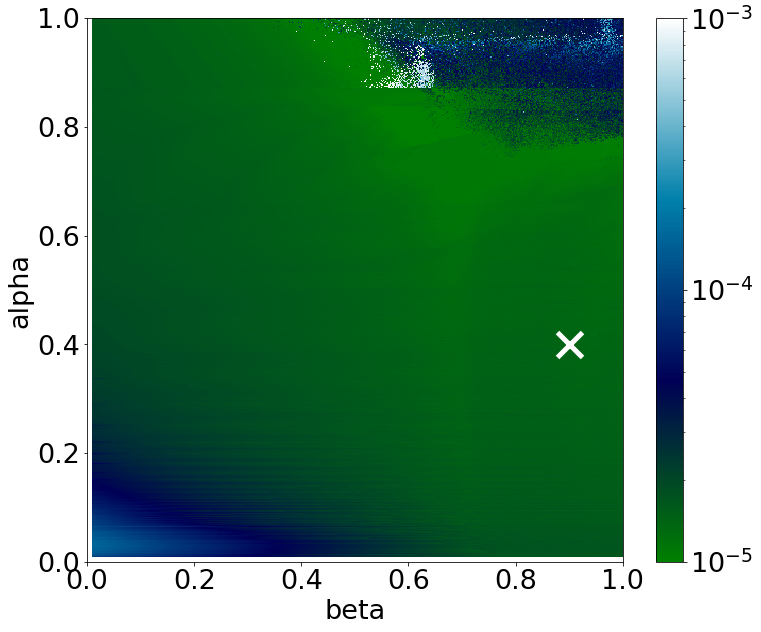

In [89]:
Z = psi_BDF2

smooth_fig = plt.figure(figsize=(12.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_BDF2.shape[0]
n_x = beta_BDF2.shape[0]

X, Y = np.meshgrid(beta_BDF2, alpha_BDF2)

plt.pcolor(X, Y, Z, norm=colors.LogNorm(vmin=psi_err_min, vmax=psi_err_max), cmap='ocean')

plt.colorbar()

plt.xlim([0,1])
plt.ylim([0,1])


plt.plot(alpha_final_BDF2, beta_final_BDF2, 'x', MarkerSize='25',markeredgewidth=5, Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_BDF23_psi.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


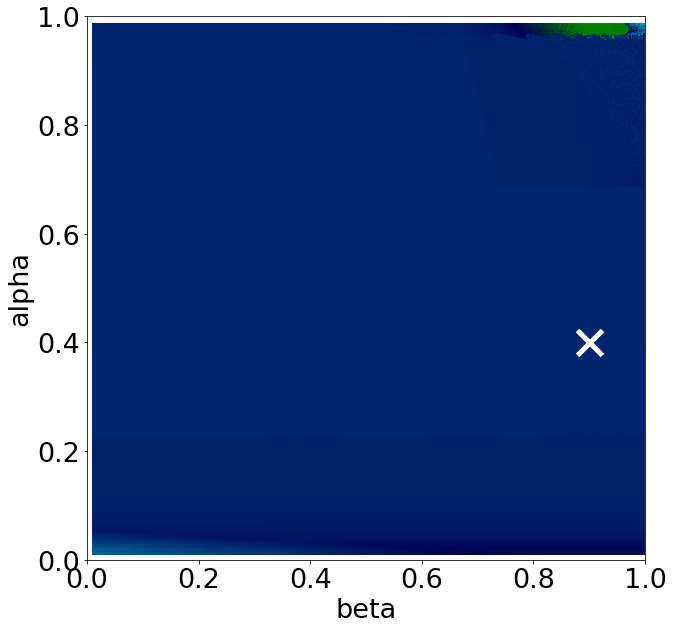

In [90]:
Z = psi_BDF1

smooth_fig = plt.figure(figsize=(10.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_BDF1.shape[0]
n_x = beta_BDF1.shape[0]

X, Y = np.meshgrid(beta_BDF1, alpha_BDF1)

plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=psi_err_min, vmax=psi_err_max), cmap='ocean')

plt.xlim([0,1])
plt.ylim([0,1])

#plt.colorbar()

plt.plot(alpha_final_BDF1, beta_final_BDF1, 'x', MarkerSize='25',markeredgewidth=5,Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_BDF12_psi.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


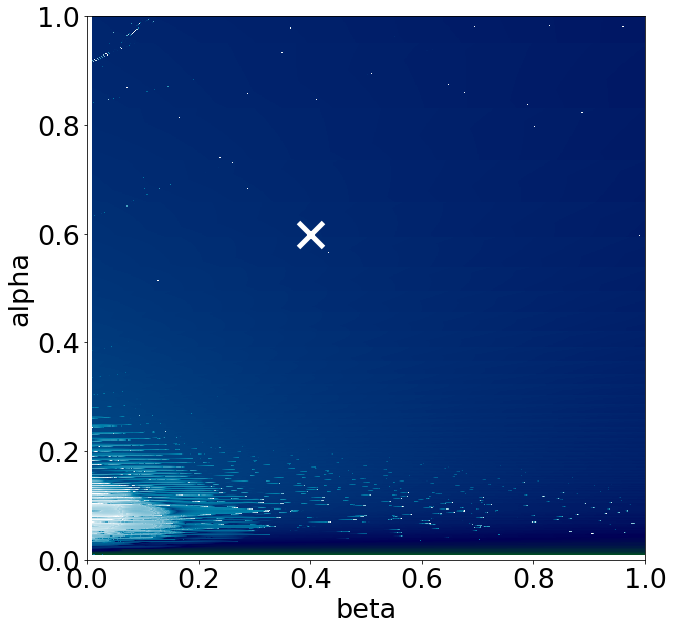

In [91]:
Z = psi_RKF4

smooth_fig = plt.figure(figsize=(10.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_RKF4.shape[0]
n_x = beta_RKF4.shape[0]

X, Y = np.meshgrid(beta_RKF4, alpha_RKF4)

plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=psi_err_min, vmax=psi_err_max), cmap='ocean')

#plt.colorbar()
plt.xlim([0,1])
plt.ylim([0,1])


plt.plot(alpha_final_RKF4, beta_final_RKF4, 'x', MarkerSize='25',markeredgewidth=5,Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_RKF45_psi.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


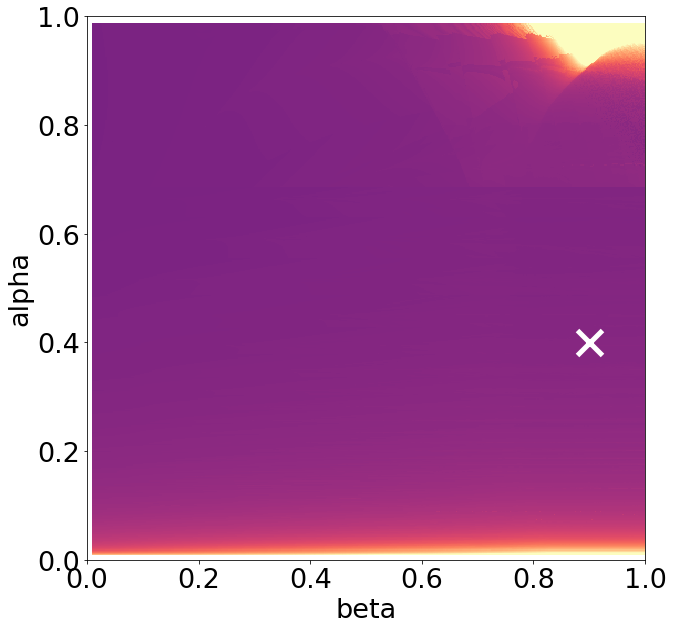

In [92]:
Z = TS_BDF1

smooth_fig = plt.figure(figsize=(10.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_BDF1.shape[0]
n_x = beta_BDF1.shape[0]-1

X, Y = np.meshgrid(beta_BDF1, alpha_BDF1)

TS_min = 70
TS_max = 500

plt.pcolor(X, Y, Z,vmin=TS_min, vmax=TS_max, cmap='magma')

plt.xlim([0,1])
plt.ylim([0,1])


#plt.colorbar()

plt.plot(alpha_final_BDF1, beta_final_BDF1, 'x', MarkerSize='25',markeredgewidth=5,Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_BDF12_TS.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


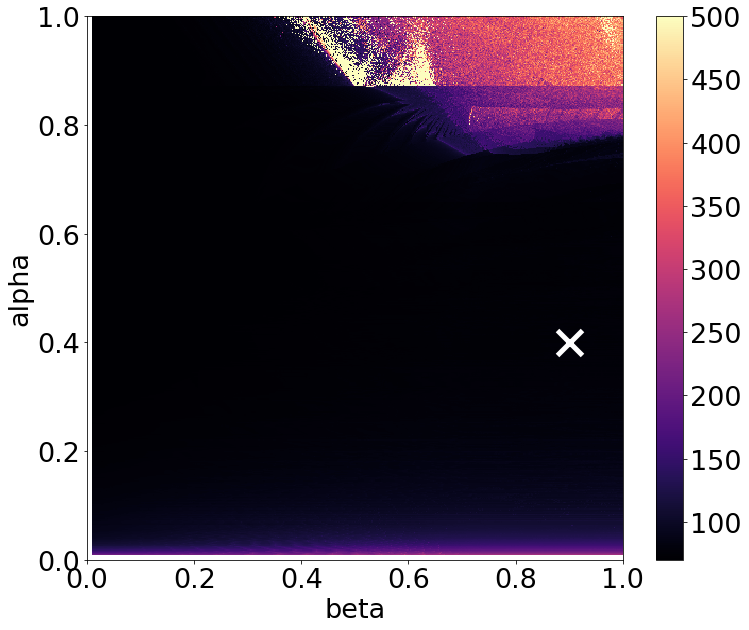

In [93]:
Z = TS_BDF2

smooth_fig = plt.figure(figsize=(12.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_BDF2.shape[0]
n_x = beta_BDF2.shape[0]-1

X, Y = np.meshgrid(beta_BDF2, alpha_BDF2)

plt.pcolor(X, Y, Z,vmin=TS_min, vmax=TS_max, cmap='magma')

plt.xlim([0,1])
plt.ylim([0,1])

plt.colorbar()

plt.plot(alpha_final_BDF2, beta_final_BDF2, 'x', MarkerSize='25',markeredgewidth=5, Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_BDF23_TS.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


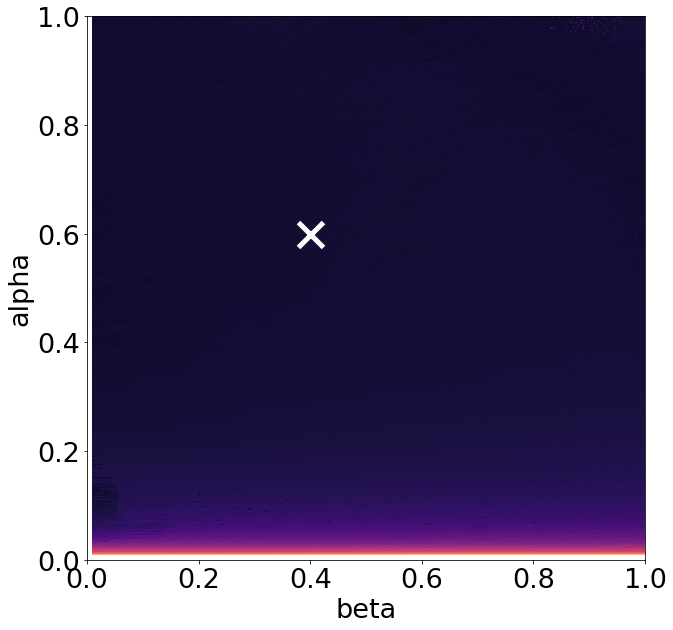

In [94]:
Z = TS_RKF4

smooth_fig = plt.figure(figsize=(10.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_RKF4.shape[0]
n_x = beta_RKF4.shape[0]-1

X, Y = np.meshgrid(beta_RKF4, alpha_RKF4)

plt.pcolor(X, Y, Z,vmin=TS_min, vmax=TS_max, cmap='magma')

plt.xlim([0,1])
plt.ylim([0,1])


plt.plot(alpha_final_RKF4, beta_final_RKF4, 'x', MarkerSize='25',markeredgewidth=5,Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_RKF45_TS.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


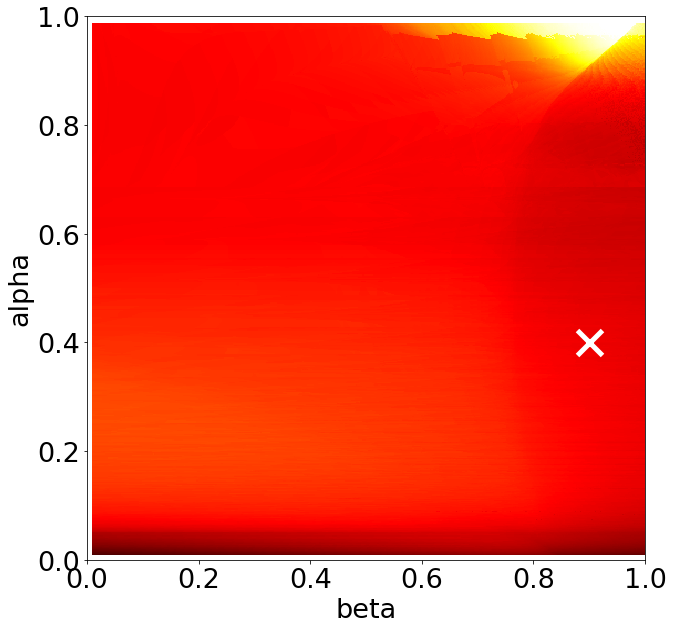

In [6]:
Z = NI_BDF1-1

smooth_fig = plt.figure(figsize=(10.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_BDF1.shape[0]
n_x = beta_BDF1.shape[0]-1

X, Y = np.meshgrid(beta_BDF1, alpha_BDF1)


NI_min = 0
NI_max = 1

plt.pcolor(X, Y, Z, vmin=NI_min, vmax=NI_max, cmap='hot')

plt.xlim([0,1])
plt.ylim([0,1])

#plt.colorbar()

plt.plot(alpha_final_BDF1, beta_final_BDF1, 'x', MarkerSize='25',markeredgewidth=5,Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_BDF12_NI.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


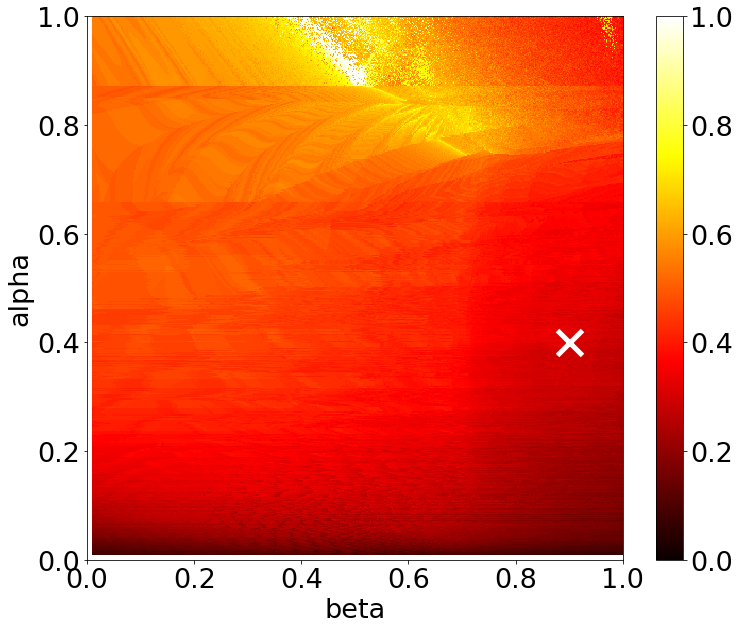

In [7]:
Z = NI_BDF2 - 1

smooth_fig = plt.figure(figsize=(12.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_BDF2.shape[0]
n_x = beta_BDF2.shape[0]-1

X, Y = np.meshgrid(beta_BDF2, alpha_BDF2)

plt.pcolor(X, Y, Z,vmin=NI_min, vmax=NI_max, cmap='hot')

plt.xlim([0,1])
plt.ylim([0,1])

plt.colorbar()

plt.plot(alpha_final_BDF2, beta_final_BDF2, 'x', MarkerSize='25',markeredgewidth=5,Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")
plt.savefig('../results/analysis_BDF23_NI.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


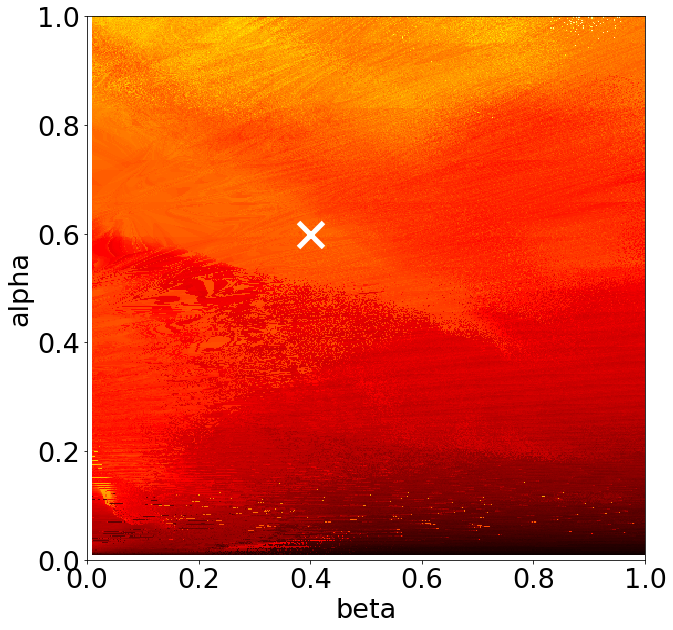

In [8]:
Z = NI_RKF4-1

smooth_fig = plt.figure(figsize=(10.00,10.00))
plt.rcParams.update({'font.size': 27})

n_y = alpha_RKF4.shape[0]
n_x = beta_RKF4.shape[0]-1

X, Y = np.meshgrid(beta_RKF4, alpha_RKF4)

plt.pcolor(X, Y, Z,vmin=NI_min, vmax=NI_max, cmap='hot')

plt.xlim([0,1])
plt.ylim([0,1])

#plt.colorbar()

plt.plot(alpha_final_RKF4, beta_final_RKF4, 'x', MarkerSize='25',markeredgewidth=5, Color='white')

plt.ylabel("alpha")
plt.xlabel("beta")

plt.savefig('../results/analysis_RKF45_NI.png', format='png',dpi=300, bbox_inches='tight')


plt.show()


In [9]:
NITS = NI*TS
k = np.argmin(NITS)
n_y = alpha.shape[0]
n_x = beta.shape[0]
i = int(np.floor(k / n_y))
j = k % n_y
print("minimum number of applications of the RKF45 scheme is ", NITS[i,j], "for alpha = ",alpha[j],"and beta = ",beta[i])
print("at this point, the error in V is ",V[i,j], "and in psi is ",psi[i,j])

NITS_elementary = NITS[-1,0]
NITS_PI_comtroller = NITS[int(0.4*(n_x-1)),int(0.9*(n_y-1))]
print('number of step executions with the elementary controller: ',NITS_elementary)
print('number of step executions with the PI controller: ',NITS_PI_comtroller)
print('Reached decrease: ', NITS_elementary / NITS_PI_comtroller)

NameError: name 'NI' is not defined

In [ ]:
NITS = NI*TS
k = np.argmin(V)
n_x = alpha.shape[0]
n_y = beta.shape[0]
i = int(np.floor(k / n_y))-14
j = k % n_y-28
print("minimum error in velocity is ", V[i,j], "for alpha = ",alpha[j],"and beta = ",beta[i])
print("at this point, the number of applications of the RKF45 scheme is ",NITS[i,j], "and the error in psi is ",psi[i,j])


In [98]:
NITS = NI*TS
k = np.argmin(psi)
n_x = alpha.shape[0]
n_y = beta.shape[0]
i = int(np.floor(k / n_y))
j = k % n_y
print("minimum error in psi is", psi[i,j], "for alpha =",alpha[j],"and beta =",beta[i])
print("at this point, the number of applications of the RKF45 scheme is ",NITS[i,j], "and the error in the velocity is ",V[i,j])



minimum error in psi is 0.0100448 for alpha = 0.978176 and beta = 0.700421
at this point, the number of applications of the RKF45 scheme is  544.0012 and the error in the velocity is  0.013341


In [100]:
i = int(0.9 * 500)    # beta
j = int(0.5 * 500)    # alpha
print("V error:",V[i,j],"  psi error:",psi[i,j],"  number of iterations:",NITS[i,j])

V error: 0.00250977   psi error: 3.42813e-06   number of iterations: 72454.84


In [ ]:
convert -trim analysis_BDF12_NITS.png analysis_BDF12_NITS.png
convert -trim analysis_BDF12_V.png analysis_BDF12_V.png
convert -trim analysis_BDF12_TS.png analysis_BDF12_TS.png
convert -trim analysis_BDF12_psi.png analysis_BDF12_psi.png
convert -trim analysis_BDF12_NI.png analysis_BDF12_NI.png

convert -trim analysis_BDF23_NITS.png analysis_BDF23_NITS.png
convert -trim analysis_BDF23_V.png analysis_BDF23_V.png
convert -trim analysis_BDF23_TS.png analysis_BDF23_TS.png
convert -trim analysis_BDF23_psi.png analysis_BDF23_psi.png
convert -trim analysis_BDF23_NI.png analysis_BDF23_NI.png

convert -trim analysis_RKF45_NITS.png analysis_RKF45_NITS.png
convert -trim analysis_RKF45_V.png analysis_RKF45_V.png
convert -trim analysis_RKF45_TS.png analysis_RKF45_TS.png
convert -trim analysis_RKF45_psi.png analysis_RKF45_psi.png
convert -trim analysis_RKF45_NI.png analysis_RKF45_NI.png


In [14]:
from matplotlib.pyplot import rc, rcParams
from mpl_toolkits.axes_grid1 import ImageGrid

np.seterr(divide='ignore')


# Sources: Matplotlib documentation -
# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
# https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar

def heatmap(data, row_labels, col_labels, fig=None,
            x_label='',
            y_label='',
            cbar_kw={},
            cbarlabel="",
            use_cbar=True,
            rotate_x_label=0,
            use_cbar_tick_labels=True,
            **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    # Plot the heatmap
    if use_cbar:
        grid = ImageGrid(fig, 111,  # as in plt.subplot(111)
                         nrows_ncols=(1, 1),
                         axes_pad=0.15,
                         share_all=True,
                         cbar_location="right",
                         cbar_mode="single",
                         cbar_size=0.3,
                         cbar_pad=0.3,
                         )
    else:
        grid = ImageGrid(fig, 111,  # as in plt.subplot(111)
                         nrows_ncols=(1, 1),
                         axes_pad=0.15,
                         share_all=True)

    ax = grid.axes_all[0]
    im = ax.imshow(data, origin='lower', **kwargs)
    clim_vals = im.get_clim()
    im.set_clim(clim_vals[0] - 0.5, clim_vals[1] + 0.5)
    # Create colorbar
    if use_cbar:
        ax.cax.cla()
        cbar = ax.figure.colorbar(im, ax.cax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", size='xx-large')
        cbar.ax.tick_params(labelsize='large')
        if not use_cbar_tick_labels:
            cbar.ax.tick_params(labelsize=0)
    else:
        cbar = None

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(row_labels, size='x-large')
    ax.set_yticklabels(col_labels, size='x-large')

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=rotate_x_label, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
    ax.grid(which="minor", color="k", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.set_xlabel(x_label, size='xx-large')
    ax.set_ylabel(y_label, size='xx-large')

    return im, cbar


def annotate_heatmap(im, data=None, data_text=None,
                     write_val=True,
                     write_type=True,
                     valfmt="{x:.1e}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(np.log10(np.abs(np.max(data[np.logical_not(np.isnan(data))])))) / 2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    data_int = 'int' in str(data.dtype)  # check if we have float or int entries
    fontsize_cells = 8
    if data_int or not write_val:
        valfmt = matplotlib.ticker.StrMethodFormatter('{x}')
        fontsize_cells = 'x-large'

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    # Text templates
    text_str_template_no_val = r'''\textbf{%(type)s}'''
    text_str_template_no_type = r'''\textbf{%(val)s}'''
    text_str_template_val = r'''\textbf{%(type)s}''' '\n' r'''\textbf{%(val)s}'''

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm((np.log10(np.abs(data[i, j])))) > threshold)])
            if np.abs(data[i][j]) < 1e-8 and (True or np.abs(data[i][j]) != 0.):
                kw.update(color="red")
            text_str = text_str_template_val % {'type': 'Type', 'val': str(valfmt(data[i, j], None))}

            if i + j > 6:
                kw.update(color="green")

    return texts


def plot_surpluses(data,
                   data_text=None,
                   x_ticklabels='',
                   y_ticklabels='',
                   x_label='', y_label='',
                   cbarlabel="\\textbf{Surpluses} - $\log_{10}|\Delta|$",
                   use_cbar=True,
                   use_cbar_tick_labels=True,
                   cmap="Blues",
                   plt_name="Surpluses_test.svg",
                   write_val=True,
                   write_type=True,
                   rotate_x_label=0,
                   valfmt="{x:.1e}"):
    rc('text', usetex=True)
    rc('axes', linewidth=3)
    rc('font', weight='bold')
    rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'
    rcParams["font.weight"] = "bold"

    # plt.rc('text', usetex=True)
    # plt.rcParams["font.weight"] = "bold"
    # plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
    # plt.rcParams.update({'font.size': 26})

    fig = plt.figure()
    log_data = np.log10(np.abs(data.T))

    im, cbar = heatmap(log_data, x_ticklabels, y_ticklabels,
                       x_label=x_label,
                       y_label=y_label,
                       fig=fig,
                       cmap=cmap,
                       use_cbar=use_cbar,
                       cbarlabel=cbarlabel,
                       use_cbar_tick_labels=use_cbar_tick_labels,
                       rotate_x_label=rotate_x_label)
    annotate_heatmap(im, data=data, valfmt=valfmt, data_text=data_text,
                     write_val=write_val,
                     write_type=write_type)
    fig.tight_layout()
    plt.savefig(plt_name + '.svg', format='svg')
    plt.savefig(plt_name + '.png', format='png')
    plt.show()


def plot_2D(data, plt_name=""):
    rc('text', usetex=True)
    rc('axes', linewidth=0.5)
    rc('font', weight='bold')
    rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'
    rcParams["font.weight"] = "bold"
    fig = plt.figure()
    plt.plot(data[:, 0], data[:, 1], '.', markersize=10)
    fig.tight_layout()
    plt.grid()
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    plt.savefig(plt_name + '.svg', format='svg')
    plt.savefig(plt_name + '.png', format='png')

    plt.show()


def bar_2D(sobol_indices, first=True):
    rc('text', usetex=True)
    rc('axes', linewidth=0.5)
    rc('font', weight='bold')
    Sobol_indices_x = [1, 2, 3, 4, 5, 6, 7, 8]
    labels = [r'$r_w$', r'$r$', r'$T_u$', r'$H_u$', r'$T_l$', r'$H_l$', r'$L$', r'$K_w$']
    fig = plt.figure()
    barlist = plt.bar(Sobol_indices_x, sobol_indices, align='center', tick_label=sobol_indices)
    barlist[0].set_color('r')
    barlist[1].set_color('b')
    barlist[2].set_color('g')
    barlist[3].set_color('m')
    barlist[4].set_color('k')
    barlist[5].set_color('g')
    barlist[6].set_color('m')
    barlist[7].set_color('k')
    plt.xticks(Sobol_indices_x, labels, fontsize=24)
    plt.yticks(fontsize=20)
    if first:
        title_str = r'''\textbf{First-order Sobol indices}'''
    else:
        title_str = r'''\textbf{Total-order Sobol indices}'''
    plt.title(title_str, fontsize=26)
    fig.tight_layout()
    plt_name = 'Sobol_indices_Borehole'
    plt.savefig(plt_name + '.svg', format='svg')
    plt.savefig(plt_name + '.png', format='png')

    plt.show()


# Example with bar plots
# first_order_sobol = np.array([8.28904269e-01, 1.36898508e-06, 1.21786905e-12, 4.13862274e-02,
#                               5.27132318e-06, 4.13862274e-02, 3.93461266e-02, 9.52194828e-03])
#
# total_order_sobol = [8.66827859e-01, 3.00141852e-06, 1.21786905e-12, 5.41127430e-02,
#                      1.08289616e-05, 5.41127430e-02, 5.20866271e-02, 1.27307140e-02]
#
# bar_2D(first_order_sobol, first=True)
# bar_2D(total_order_sobol, first=False)

# Example 1: Simple heatmap:
data = np.array([[0, 0, 1, 1],
                 [0, 1e1, 1e1, 0],
                 [1e2, 1e2, 0, 0],
                 [1e3, 0, 0, 0]]).T

# MFMC
x_label = r'\textbf{Models fidelity}'
y_label = r'\textbf{Number of MC evaluations}'
y_ticklabels = [r'$M_1$', r'$M_2$', r'$M_3$', r'$M_4$']
x_ticklabels = [r'$f^{(4)}$', r'$f^{(3)}$', r'$f^{(2)}$', r'$f^{(1)}$']
#
# # General
# ticklabels_template = r'''\textbf{%(label)s}'''
# x_ticklabels = [ticklabels_template % {'label': i} for i in range(1, data.shape[0] + 1)]
# y_ticklabels = x_ticklabels
# x_label = r'''$h_1$'''
# y_label = r'''$h_2$'''
#
plot_surpluses(data=data,
               x_label=x_label,
               y_label=y_label,
               x_ticklabels=x_ticklabels,
               y_ticklabels=y_ticklabels,
               rotate_x_label=0,
               cbarlabel="Cbarlabel",
               plt_name="PlotName",
               use_cbar=True,
               use_cbar_tick_labels=True,
               write_val=True,
               valfmt="{x:.1e}")

##### Example 2: Larger heatmap
plt_name = 'PlotName'
ticklabels_template = r'''\textbf{%(label)s}'''
x_label = ticklabels_template % {'label': '$h_1$'}
y_label = ticklabels_template % {'label': '$h_2$'}
max_level = 7
x_ticklabels = [ticklabels_template % {'label': level} for level in range(1, max_level + 1)]
y_ticklabels = x_ticklabels

data = np.random.rand((max_level, max_level))

plot_surpluses(data=data, plt_name=plt_name,
               write_type=True, write_val=False,
               x_ticklabels=x_ticklabels,
               y_ticklabels=y_ticklabels,
               x_label=x_label, y_label=y_label,
               use_cbar=False)

NameError: name 'matplotlib' is not defined

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/raffael/.cache/matplotlib/tex.cache/e4159bfd87d32c4a26a82a38aeac4461.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 16 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.5 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on e4159bfd87d32c4a26a82a38aeac4461.log.




<Figure size 432x288 with 2 Axes>